<a href="https://colab.research.google.com/github/SamDarkKnight/EDA-PROJECT/blob/main/22BDS0413.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (7584, 10)


,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
0,1,20,M,S1WantCurse,no,1,curse,other,want,N
1,2,11,M,S1WantCurse,no,2,curse,other,want,N
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y


,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
7579,7580,17,M,S4DoShout,no,312,shout,self,do,N
7580,7581,20,F,S4DoShout,no,313,shout,self,do,N
7581,7582,25,F,S4DoShout,no,314,shout,self,do,N
7582,7583,23,F,S4DoShout,no,315,shout,self,do,N
7583,7584,12,F,S4DoShout,no,316,shout,self,do,N



Data Types:
 rownames     int64
Anger        int64
Gender      object
item        object
resp        object
id           int64
btype       object
situ        object
mode        object
r2          object
dtype: object

Missing Values:
 rownames    0
Anger       0
Gender      0
item        0
resp        0
id          0
btype       0
situ        0
mode        0
r2          0
dtype: int64

Unique Values per Column:
 rownames    7584
Anger         26
Gender         2
item          24
resp           3
id           316
btype          3
situ           2
mode           2
r2             2
dtype: int64

=== Summary Statistics ===
          rownames        Anger         id
count  7584.000000  7584.000000  7584.0000
mean   3792.500000    20.003165   158.5000
std    2189.456554     4.841139    91.2269
min       1.000000    11.000000     1.0000
25%    1896.750000    17.000000    79.7500
50%    3792.500000    19.000000   158.5000
75%    5688.250000    23.000000   237.2500
max    7584.000000    39.000

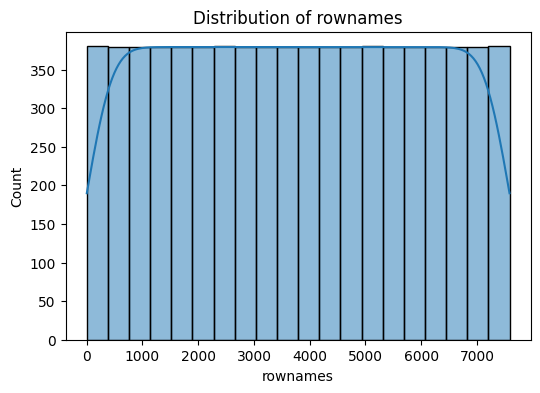

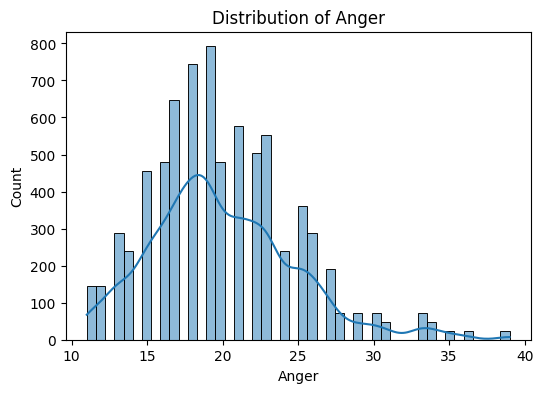

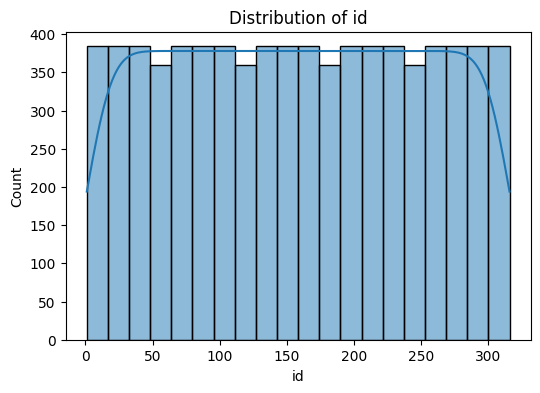

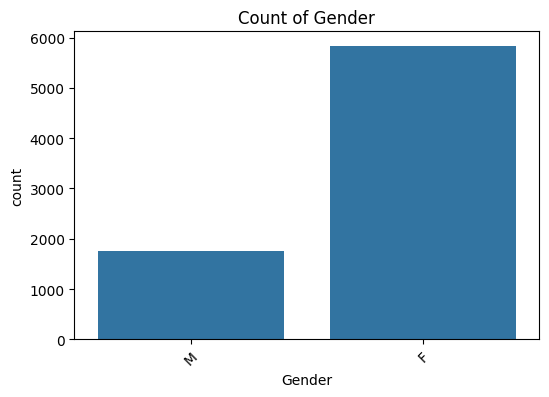

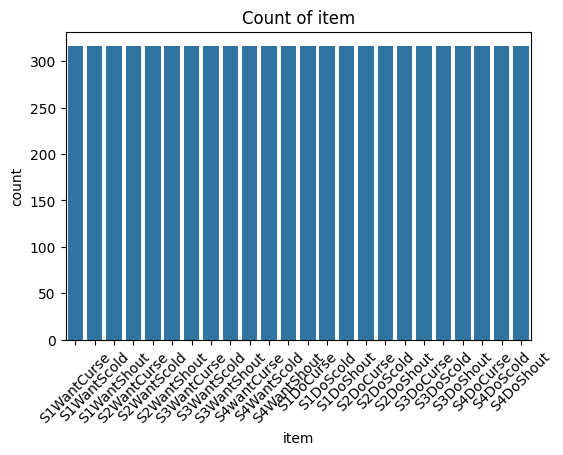

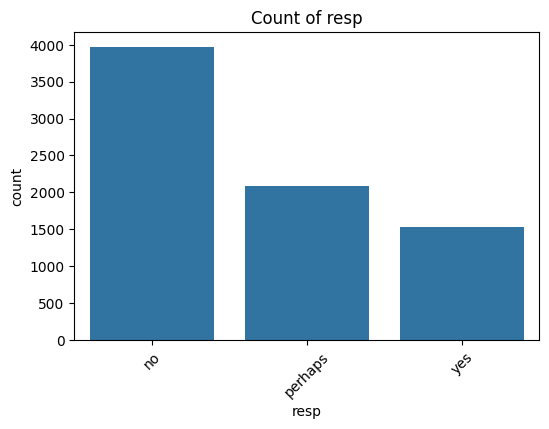

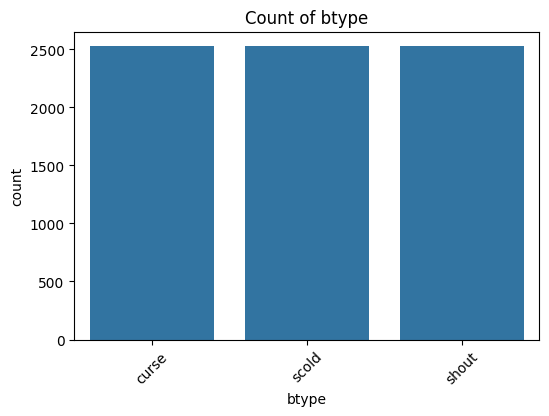

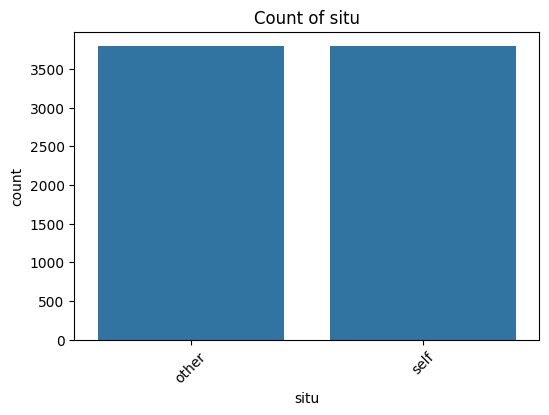

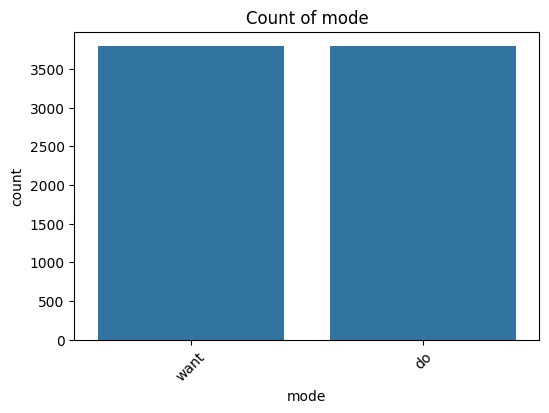

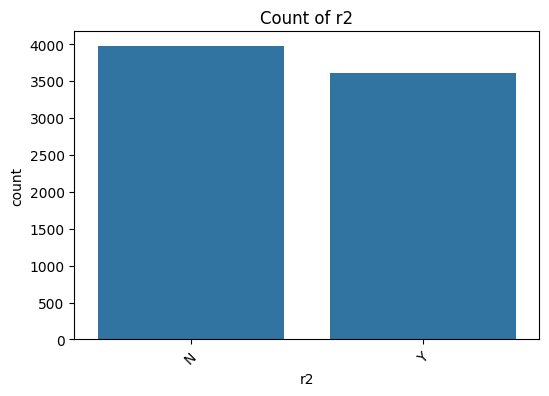

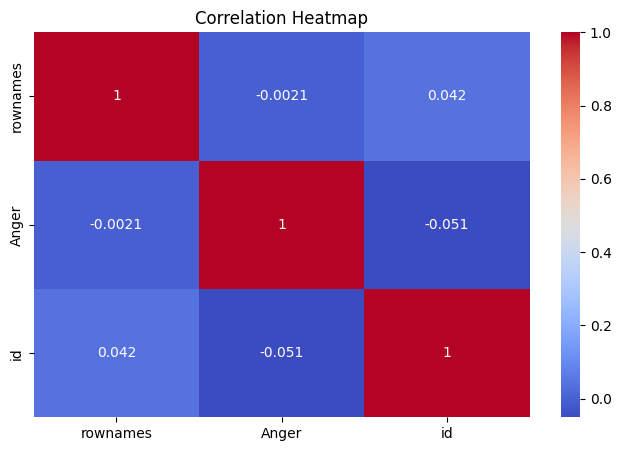

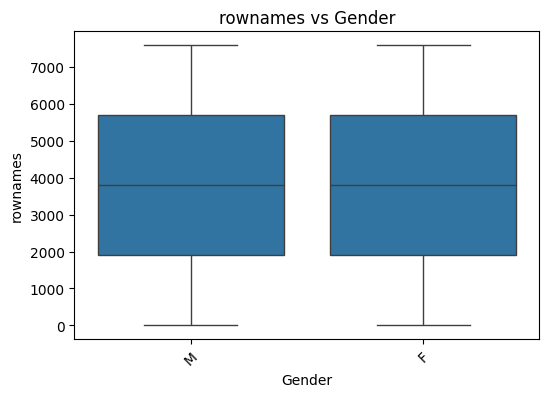

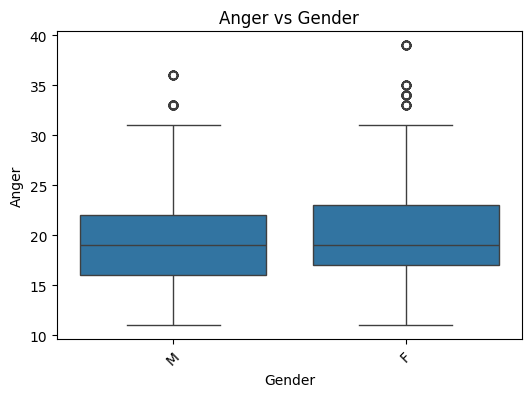

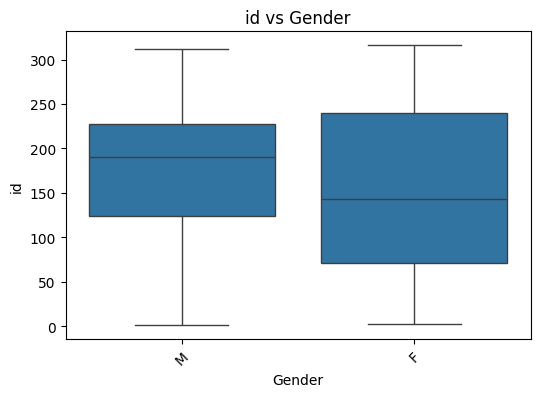

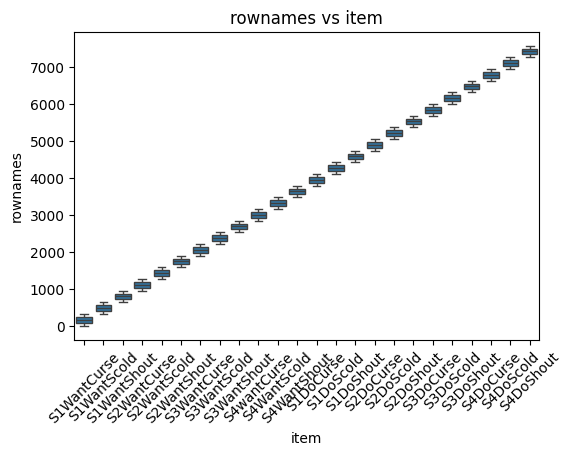

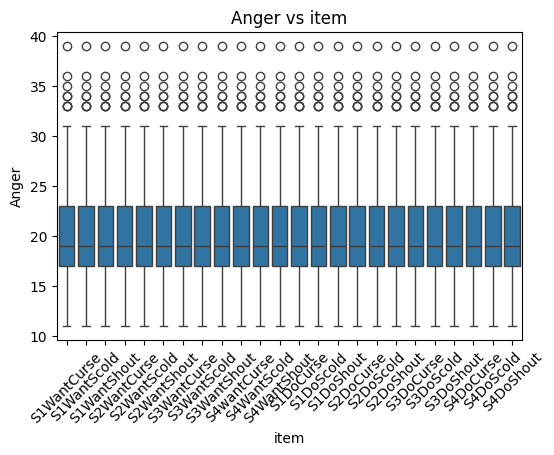

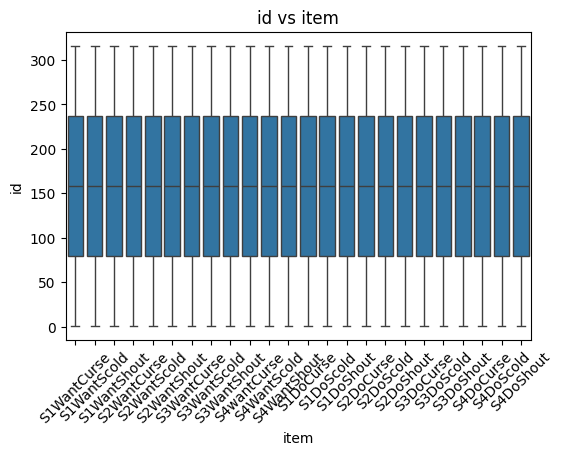

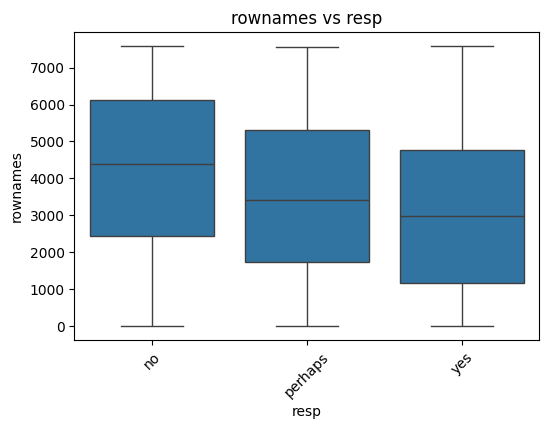

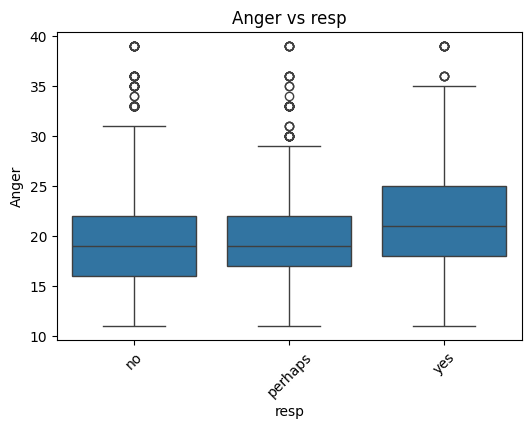

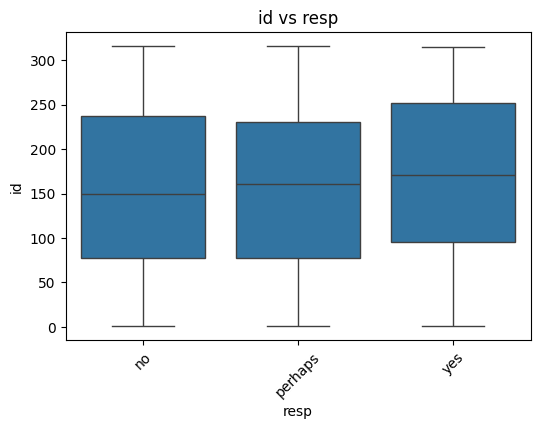

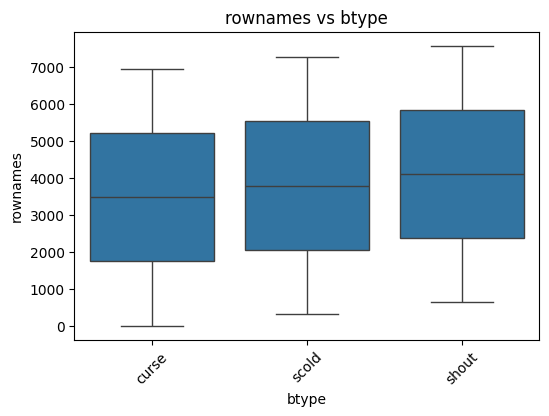

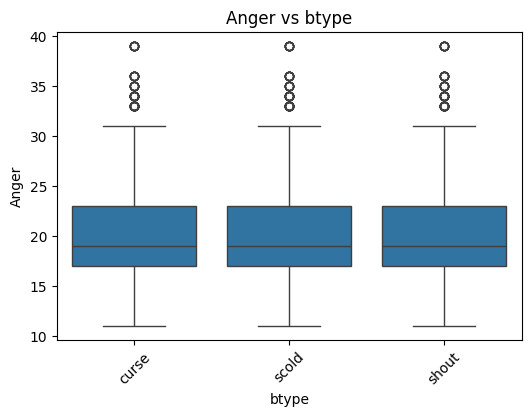

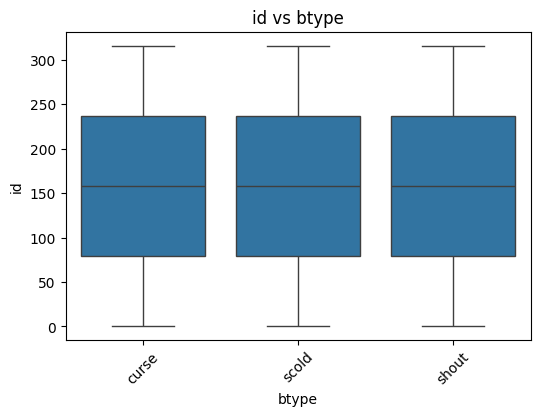

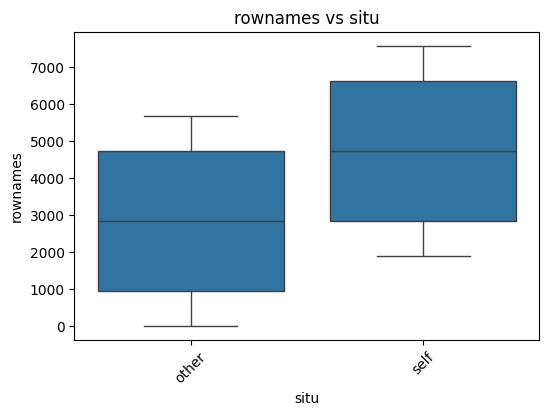

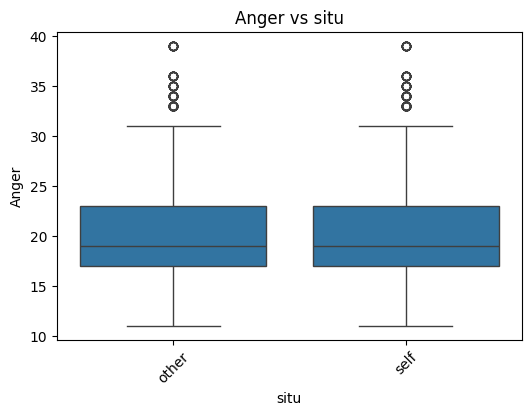

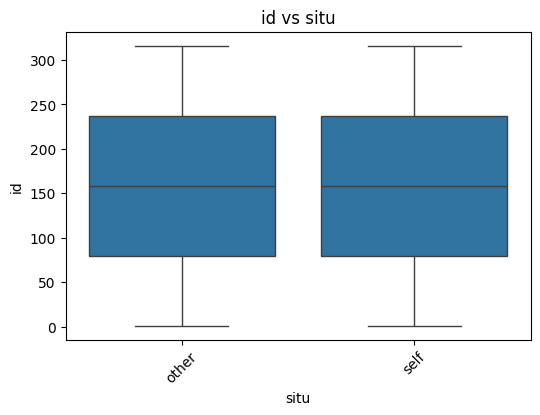

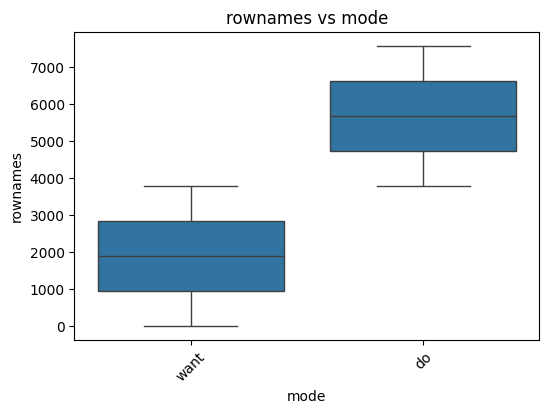

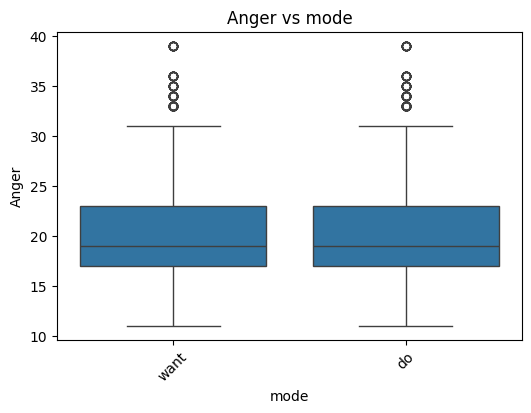

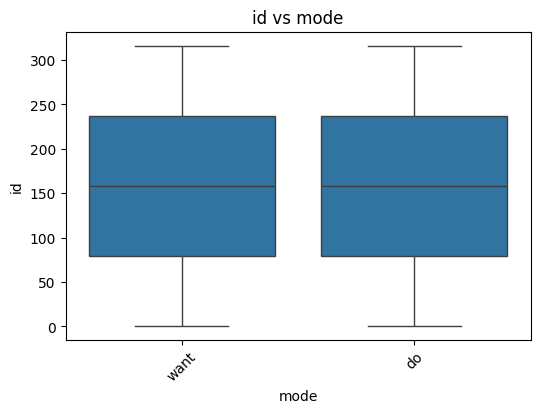

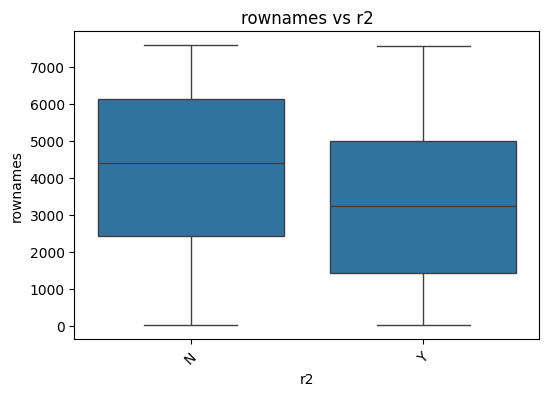

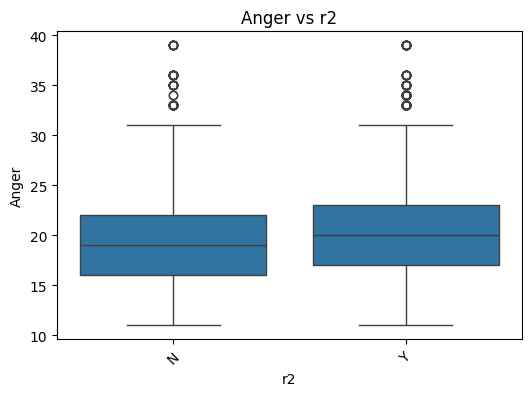

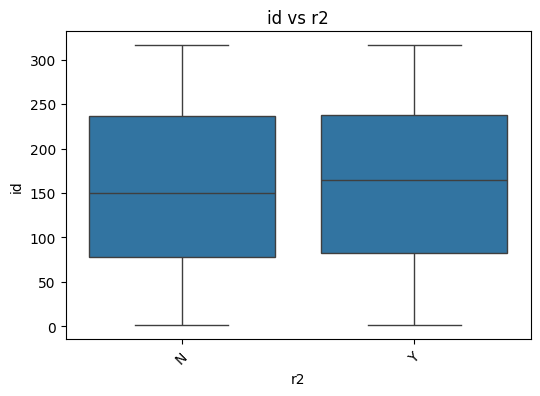

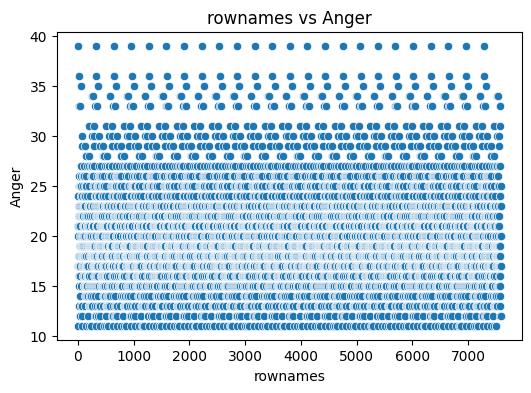

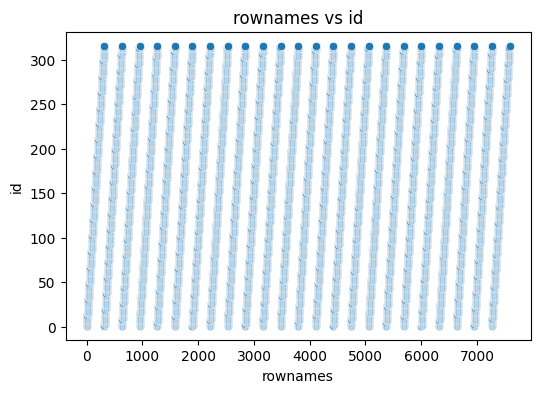

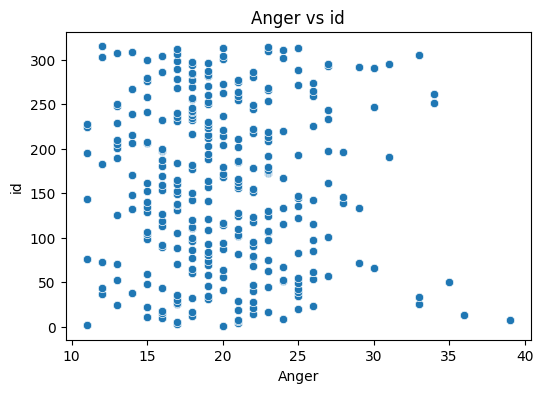


Chi-square test p-value: 0.00036681956948458525


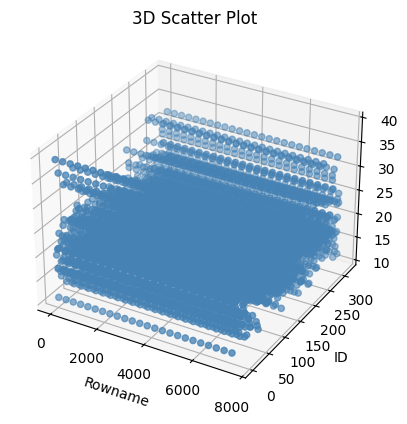

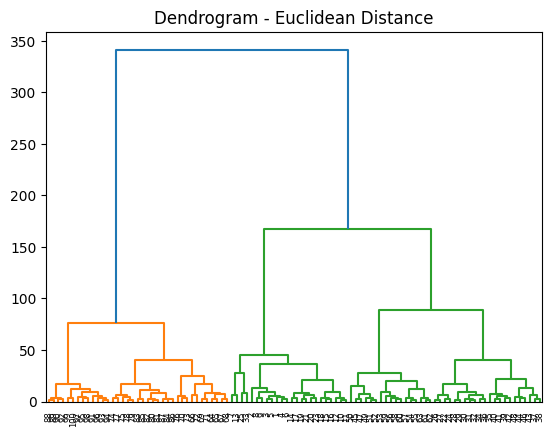

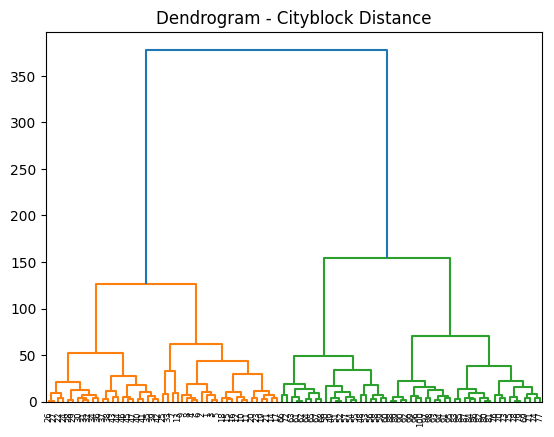

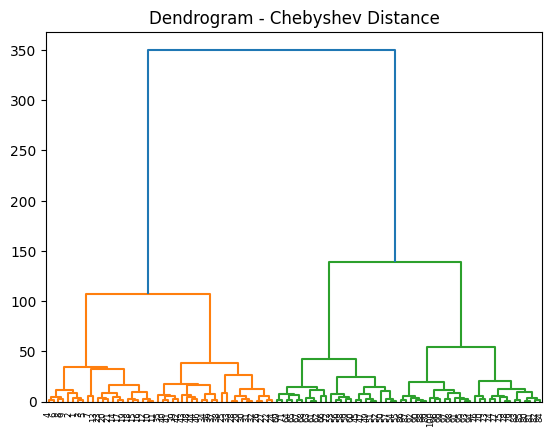

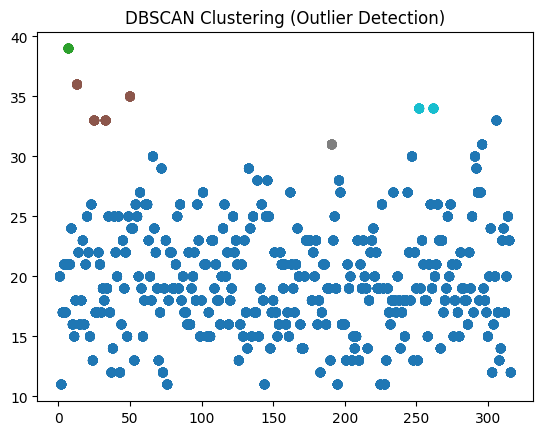


Missing values after imputation:
 rownames    0
Anger       0
Gender      0
item        0
resp        0
id          0
btype       0
situ        0
mode        0
r2          0
Cluster     0
dtype: int64

Explained Variance Ratio: [0.26141749 0.16971832]


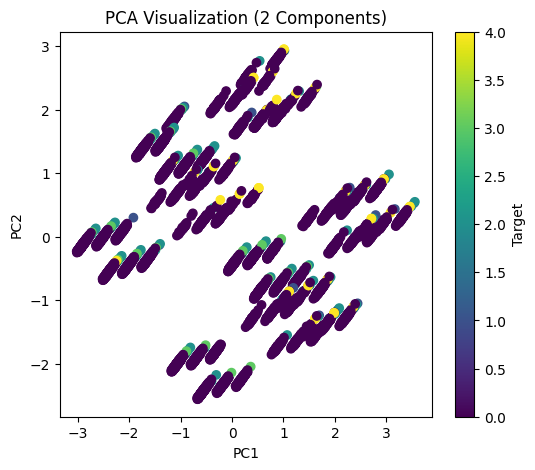


 Accuracy: 0.9753954305799648

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2217
         1.0       0.00      0.00      0.00         8
         2.0       0.09      0.04      0.06        25
         3.0       0.00      0.00      0.00         6
         4.0       0.80      0.40      0.53        20

    accuracy                           0.98      2276
   macro avg       0.37      0.29      0.32      2276
weighted avg       0.97      0.98      0.97      2276



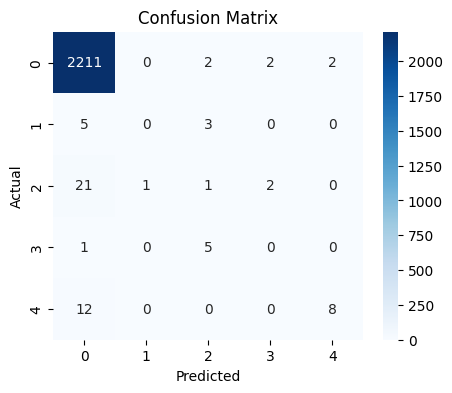

In [61]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, chi2_contingency
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

#Load Dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/VerbAgg.csv"
df = pd.read_csv(url)
print("Shape:", df.shape)
display(df.head(), df.tail())

#Data Overview
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values per Column:\n", df.nunique())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(exclude=[np.number]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Remove duplicates
df.drop_duplicates(inplace=True)

#Descriptive Statistics
num_cols = df.select_dtypes(include=['number']).columns
print("\n=== Summary Statistics ===")
print(df[num_cols].describe())

for col in num_cols:
    print(f"\n{col}: Mean={df[col].mean()}, Median={df[col].median()}, Mode={list(df[col].mode())}")

print("\nSkewness:\n", df[num_cols].skew())
print("\nKurtosis:\n", df[num_cols].kurtosis())

#Visualizations
# Histograms
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

#Countplots
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

#Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Bivariate: Boxplots & Scatterplots
for col in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x=col, y=num)
        plt.title(f"{num} vs {col}")
        plt.xticks(rotation=45)
        plt.show()

#Pairwise scatter
for (x, y) in combinations(num_cols[:3], 2):
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f"{x} vs {y}")
    plt.show()


#Chi-square test (Gender vs r2)
if "Gender" in df.columns and "r2" in df.columns:
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(df["Gender"], df["r2"]))
    print(f"\nChi-square test p-value: {p}")

#3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["rownames"], df["id"], df["Anger"], c="steelblue")
ax.set_xlabel("Rowname")
ax.set_ylabel("ID")
ax.set_zlabel("Anger")
plt.title("3D Scatter Plot")
plt.show()

#Hierarchical Clustering
df_small = df.iloc[:100][["Anger", "id"]]
for method in ["euclidean", "cityblock", "chebyshev"]:
    dist_matrix = pdist(df_small.values, metric=method)
    linkage_matrix = linkage(dist_matrix, method="ward")
    plt.figure()
    dendrogram(linkage_matrix, labels=df_small["id"].values, leaf_rotation=90, leaf_font_size=6)
    plt.title(f"Dendrogram - {method.capitalize()} Distance")
    plt.show()

#DBSCAN Clustering
X_db = StandardScaler().fit_transform(df[["Anger", "id"]])
db = DBSCAN(eps=0.5, min_samples=5).fit(X_db)
df["Cluster"] = db.labels_
plt.scatter(df["id"], df["Anger"], c=df["Cluster"], cmap="tab10")
plt.title("DBSCAN Clustering (Outlier Detection)")
plt.show()

#Missing Value Imputation (Iterative Imputer)
num_cols = df.select_dtypes(include=['number']).columns
imp = IterativeImputer(random_state=0)
df[num_cols] = imp.fit_transform(df[num_cols])
print("\nMissing values after imputation:\n", df.isnull().sum())

#Encoding
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

#Feature Scaling
X = df.drop(columns=["Cluster"]) if "Cluster" in df.columns else df.iloc[:,:-1]
y = df["Cluster"] if "Cluster" in df.columns else df.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA (Dimensionality Reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis")
plt.title("PCA Visualization (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Target")
plt.show()

#Classification Model
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Model Evaluation
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
